In [ ]:
# Import required libraries
import re
import string
import nltk
import spacy
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data (if not already downloaded)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Load spaCy model (install with: python -m spacy download en_core_web_sm)
try:
    nlp = spacy.load("en_core_web_sm")
    print("✅ spaCy model loaded successfully!")
except OSError:
    print("❌ Please install spaCy English model: python -m spacy download en_core_web_sm")
    nlp = None

# Sample messy text data for demonstration
messy_texts = [
    "Hey there!!! Check out this AMAZING deal at https://example.com/sale 🎉",
    "EMAIL me at john.doe@company.com for more INFO!!!",
    "   So much    extra    whitespace   everywhere   ",
    "HTML content: This is a paragraph with bold text",
    "Phone: +1-555-123-4567 or call (555) 987-6543 today!",
    "Social media: Follow @username #trending #viral #amazing",
    "Mixed CASE and 123 numbers and $pecial ch@r@cters!!!",
    "Line breaks\nand\ttabs\teverywhere\r\n",
    "Contractions like don't, won't, I'm, and we're are common",
    "Numbers: 1st, 2nd, 3rd places and dates like 01/15/2024"
]

print("Sample Messy Texts:")
print("=" * 50)
for i, text in enumerate(messy_texts, 1):
    print(f"{i:2d}. {repr(text)}")


✅ spaCy model loaded successfully!
Sample Messy Texts:
 1. 'Hey there!!! Check out this AMAZING deal at https://example.com/sale 🎉'
 2. 'EMAIL me at john.doe@company.com for more INFO!!!'
 3. '   So much    extra    whitespace   everywhere   '
 4. 'HTML content: This is a paragraph with bold text'
 5. 'Phone: +1-555-123-4567 or call (555) 987-6543 today!'
 6. 'Social media: Follow @username #trending #viral #amazing'
 7. 'Mixed CASE and 123 numbers and $pecial ch@r@cters!!!'
 8. 'Line breaks\nand\ttabs\teverywhere\r\n'
 9. "Contractions like don't, won't, I'm, and we're are common"
10. 'Numbers: 1st, 2nd, 3rd places and dates like 01/15/2024'


In [ ]:
# Step-by-step text cleaning demonstration

def demonstrate_cleaning_steps(text):
    """Show each cleaning step with before/after examples"""
    print(f"Original: {repr(text)}")
    print(f"Display:  {text}")
    print("-" * 80)

    # Step 1: Remove URLs
    import re
    url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    step1 = re.sub(url_pattern, '', text)
    print(f"After URL removal: {step1}")

    # Step 2: Remove email addresses
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
    step2 = re.sub(email_pattern, '', step1)
    print(f"After email removal: {step2}")

    # Step 3: Remove HTML tags
    html_pattern = r'<[^>]+>'
    step3 = re.sub(html_pattern, '', step2)
    print(f"After HTML removal: {step3}")

    # Step 4: Remove phone numbers
    phone_pattern = r'\+?1?[-.\s]?\d{3}[-.\s]?\d{3}[-.\s]?\d{4}|\(\d{3}\)[-.\s]?\d{3}[-.\s]?\d{4}'
    step4 = re.sub(phone_pattern, '', step3)
    print(f"After phone removal: {step4}")

    # Step 5: Remove social media elements
    hashtag_pattern = r'#\w+'
    mention_pattern = r'@\w+'
    step5 = re.sub(hashtag_pattern, '', step4)
    step5 = re.sub(mention_pattern, '', step5)
    print(f"After social media removal: {step5}")

    # Step 6: Normalize whitespace
    whitespace_pattern = r'\s+'
    step6 = re.sub(whitespace_pattern, ' ', step5).strip()
    print(f"After whitespace normalization: {step6}")

    # Step 7: Convert to lowercase
    step7 = step6.lower()
    print(f"After lowercasing: {step7}")

    print("=" * 80)
    return step7

# Test with our messy examples
print("TEXT CLEANING DEMONSTRATION")
print("=" * 80)

for i, text in enumerate(messy_texts[:3], 1):  # Show first 3 examples
    print(f"\nExample {i}:")
    cleaned = demonstrate_cleaning_steps(text)
    print(f"\nFinal result: '{cleaned}'")
    print("\n" + "="*80)

TEXT CLEANING DEMONSTRATION

Example 1:
Original: 'Hey there!!! Check out this AMAZING deal at https://example.com/sale 🎉'
Display:  Hey there!!! Check out this AMAZING deal at https://example.com/sale 🎉
--------------------------------------------------------------------------------
After URL removal: Hey there!!! Check out this AMAZING deal at  🎉
After email removal: Hey there!!! Check out this AMAZING deal at  🎉
After HTML removal: Hey there!!! Check out this AMAZING deal at  🎉
After phone removal: Hey there!!! Check out this AMAZING deal at  🎉
After social media removal: Hey there!!! Check out this AMAZING deal at  🎉
After whitespace normalization: Hey there!!! Check out this AMAZING deal at 🎉
After lowercasing: hey there!!! check out this amazing deal at 🎉

Final result: 'hey there!!! check out this amazing deal at 🎉'


Example 2:
Original: 'EMAIL me at john.doe@company.com for more INFO!!!'
Display:  EMAIL me at john.doe@company.com for more INFO!!!
------------------------------

In [ ]:
# Tokenization Comparison: NLTK vs spaCy vs Simple Split

sample_text = """
Dr. Smith's research on AI (published in 2024) shows that machine learning can't
solve every problem. However, it's incredibly useful! Visit https://example.com
for more details. What do you think?
"""

print("TOKENIZATION COMPARISON")
print("=" * 60)
print(f"Sample text: {sample_text.strip()}")
print("-" * 60)

# Method 1: Simple Python split
simple_tokens = sample_text.split()
print(f"\n1. SIMPLE SPLIT ({len(simple_tokens)} tokens):")
print(f"   {simple_tokens}")

# Method 2: NLTK word tokenization
from nltk.tokenize import word_tokenize, sent_tokenize
nltk_word_tokens = word_tokenize(sample_text)
print(f"\n2. NLTK WORD TOKENIZE ({len(nltk_word_tokens)} tokens):")
print(f"   {nltk_word_tokens}")

# Method 3: NLTK sentence tokenization
nltk_sent_tokens = sent_tokenize(sample_text)
print(f"\n3. NLTK SENTENCE TOKENIZE ({len(nltk_sent_tokens)} sentences):")
for i, sent in enumerate(nltk_sent_tokens, 1):
    print(f"   {i}. {sent.strip()}")

# Method 4: spaCy tokenization (if available)
if nlp:
    doc = nlp(sample_text)
    spacy_tokens = [token.text for token in doc]
    print(f"\n4. SPACY TOKENIZE ({len(spacy_tokens)} tokens):")
    print(f"   {spacy_tokens}")

    # spaCy sentences
    spacy_sents = [sent.text.strip() for sent in doc.sents]
    print(f"\n5. SPACY SENTENCES ({len(spacy_sents)} sentences):")
    for i, sent in enumerate(spacy_sents, 1):
        print(f"   {i}. {sent}")

# Method 5: Regular expression tokenization
import re
regex_tokens = re.findall(r'\b\w+\b', sample_text)
print(f"\n6. REGEX TOKENIZE (\b\w+\b) ({len(regex_tokens)} tokens):")
print(f"   {regex_tokens}")

print("\n" + "=" * 60)
print("Key Differences:")
print("• Simple split: Fastest but crude, keeps punctuation")
print("• NLTK: Good balance, handles punctuation well")
print("• spaCy: Most sophisticated, includes linguistic analysis")
print("• Regex: Customizable but requires pattern knowledge")


TOKENIZATION COMPARISON
Sample text: Dr. Smith's research on AI (published in 2024) shows that machine learning can't
solve every problem. However, it's incredibly useful! Visit https://example.com
for more details. What do you think?
------------------------------------------------------------

1. SIMPLE SPLIT (29 tokens):
   ['Dr.', "Smith's", 'research', 'on', 'AI', '(published', 'in', '2024)', 'shows', 'that', 'machine', 'learning', "can't", 'solve', 'every', 'problem.', 'However,', "it's", 'incredibly', 'useful!', 'Visit', 'https://example.com', 'for', 'more', 'details.', 'What', 'do', 'you', 'think?']

2. NLTK WORD TOKENIZE (41 tokens):
   ['Dr.', 'Smith', "'s", 'research', 'on', 'AI', '(', 'published', 'in', '2024', ')', 'shows', 'that', 'machine', 'learning', 'ca', "n't", 'solve', 'every', 'problem', '.', 'However', ',', 'it', "'s", 'incredibly', 'useful', '!', 'Visit', 'https', ':', '//example.com', 'for', 'more', 'details', '.', 'What', 'do', 'you', 'think', '?']

3. NLTK SEN

EXEC - 1

Data set up

In [ ]:
reviews = [
    "Absolutely LOVED this product!!! Will buy again 😊 Visit http://shop.example.com",
    "Worst purchase ever... arrived broken, no response from support @helpdesk",
    "Ok quality; does the job. 5/5 stars! #satisfied",
    "Email me at user@example.org for details about bulk order!!!",
    "Super overpriced!! Paid $299 but performance is meh...",
    "<div>Great build quality</div><p>But shipping was slow</p>",
    "Contact: +44 20 7946 0958 or (020)79460958",
    "MixedCASE and random123numbers and symbols %^&*",
    "Line1\nLine2\tTabbed text\r\nEnd of review",
    "Contractions—can't, won't, shouldn't—are common here."
]


In [ ]:
import re
from bs4 import BeautifulSoup

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
    text = re.sub(r'\S+@\S+', '', text)  # Remove emails
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'@\w+|#\w+', '', text)  # Remove mentions/hashtags
    text = re.sub(r'\+?\d[\d\s\-\(\)]{8,}', '', text)  # Remove phone numbers
    text = re.sub(r'[^\w\s\']', '', text)  # Keep only alphanumeric and apostrophes
    text = re.sub(r'\s+', ' ', text).strip()  # Normalize whitespace
    return text


In [ ]:
cleaned_reviews = [clean_text(review) for review in reviews]


In [ ]:
sample = cleaned_reviews[0]
print("Cleaned Sample Review:", sample)


Cleaned Sample Review: absolutely loved this product will buy again visit


In [ ]:
split_tokens = sample.split()
print("Simple Split:", split_tokens)


Simple Split: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

nltk_tokens = word_tokenize(sample)
print("NLTK Tokens:", nltk_tokens)


NLTK Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(sample)
spacy_tokens = [token.text for token in doc]
print("spaCy Tokens:", spacy_tokens)


spaCy Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [ ]:
regex_tokens = re.findall(r"\b\w+(?:'\w+)?\b", sample)
print("Regex Tokens:", regex_tokens)


Regex Tokens: ['absolutely', 'loved', 'this', 'product', 'will', 'buy', 'again', 'visit']


In [ ]:
all_tokens = []
for review in cleaned_reviews:
    tokens = re.findall(r"\b\w+(?:'\w+)?\b", review)
    all_tokens.extend(tokens)


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

freq_dist = Counter(all_tokens)
common_tokens = freq_dist.most_common(10)
print("Top 10 Tokens:", common_tokens)


Top 10 Tokens: [('and', 2), ('absolutely', 1), ('loved', 1), ('this', 1), ('product', 1), ('will', 1), ('buy', 1), ('again', 1), ('visit', 1), ('worst', 1)]


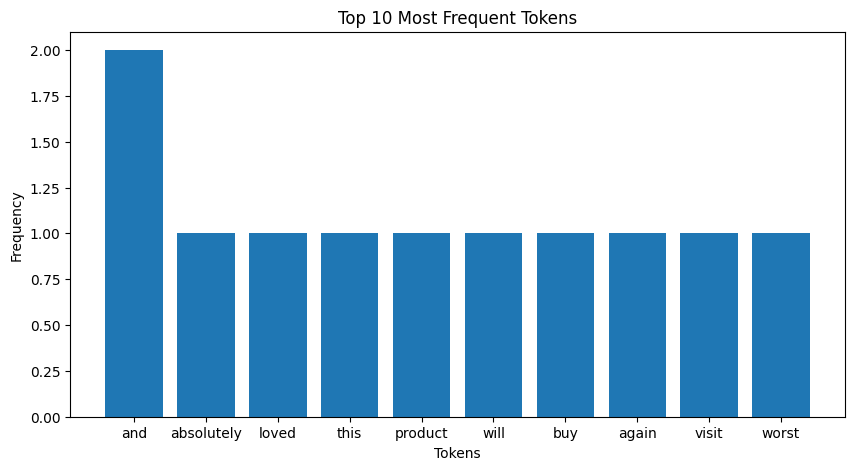

In [ ]:
tokens, counts = zip(*common_tokens)

plt.figure(figsize=(10, 5))
plt.bar(tokens, counts)
plt.title("Top 10 Most Frequent Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.show()
